In [4]:
#import the necessary libraries 
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle 
import warnings 
warnings.filterwarnings("ignore")



In [5]:
data=pd.read_csv(r"C:\Users\shashank agarwal\Downloads\baseball.csv")

In [6]:
data.head()


,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
data.shape

(30, 17)

In [8]:
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [9]:
#check if their is any null value present 
data.isna().sum()


W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

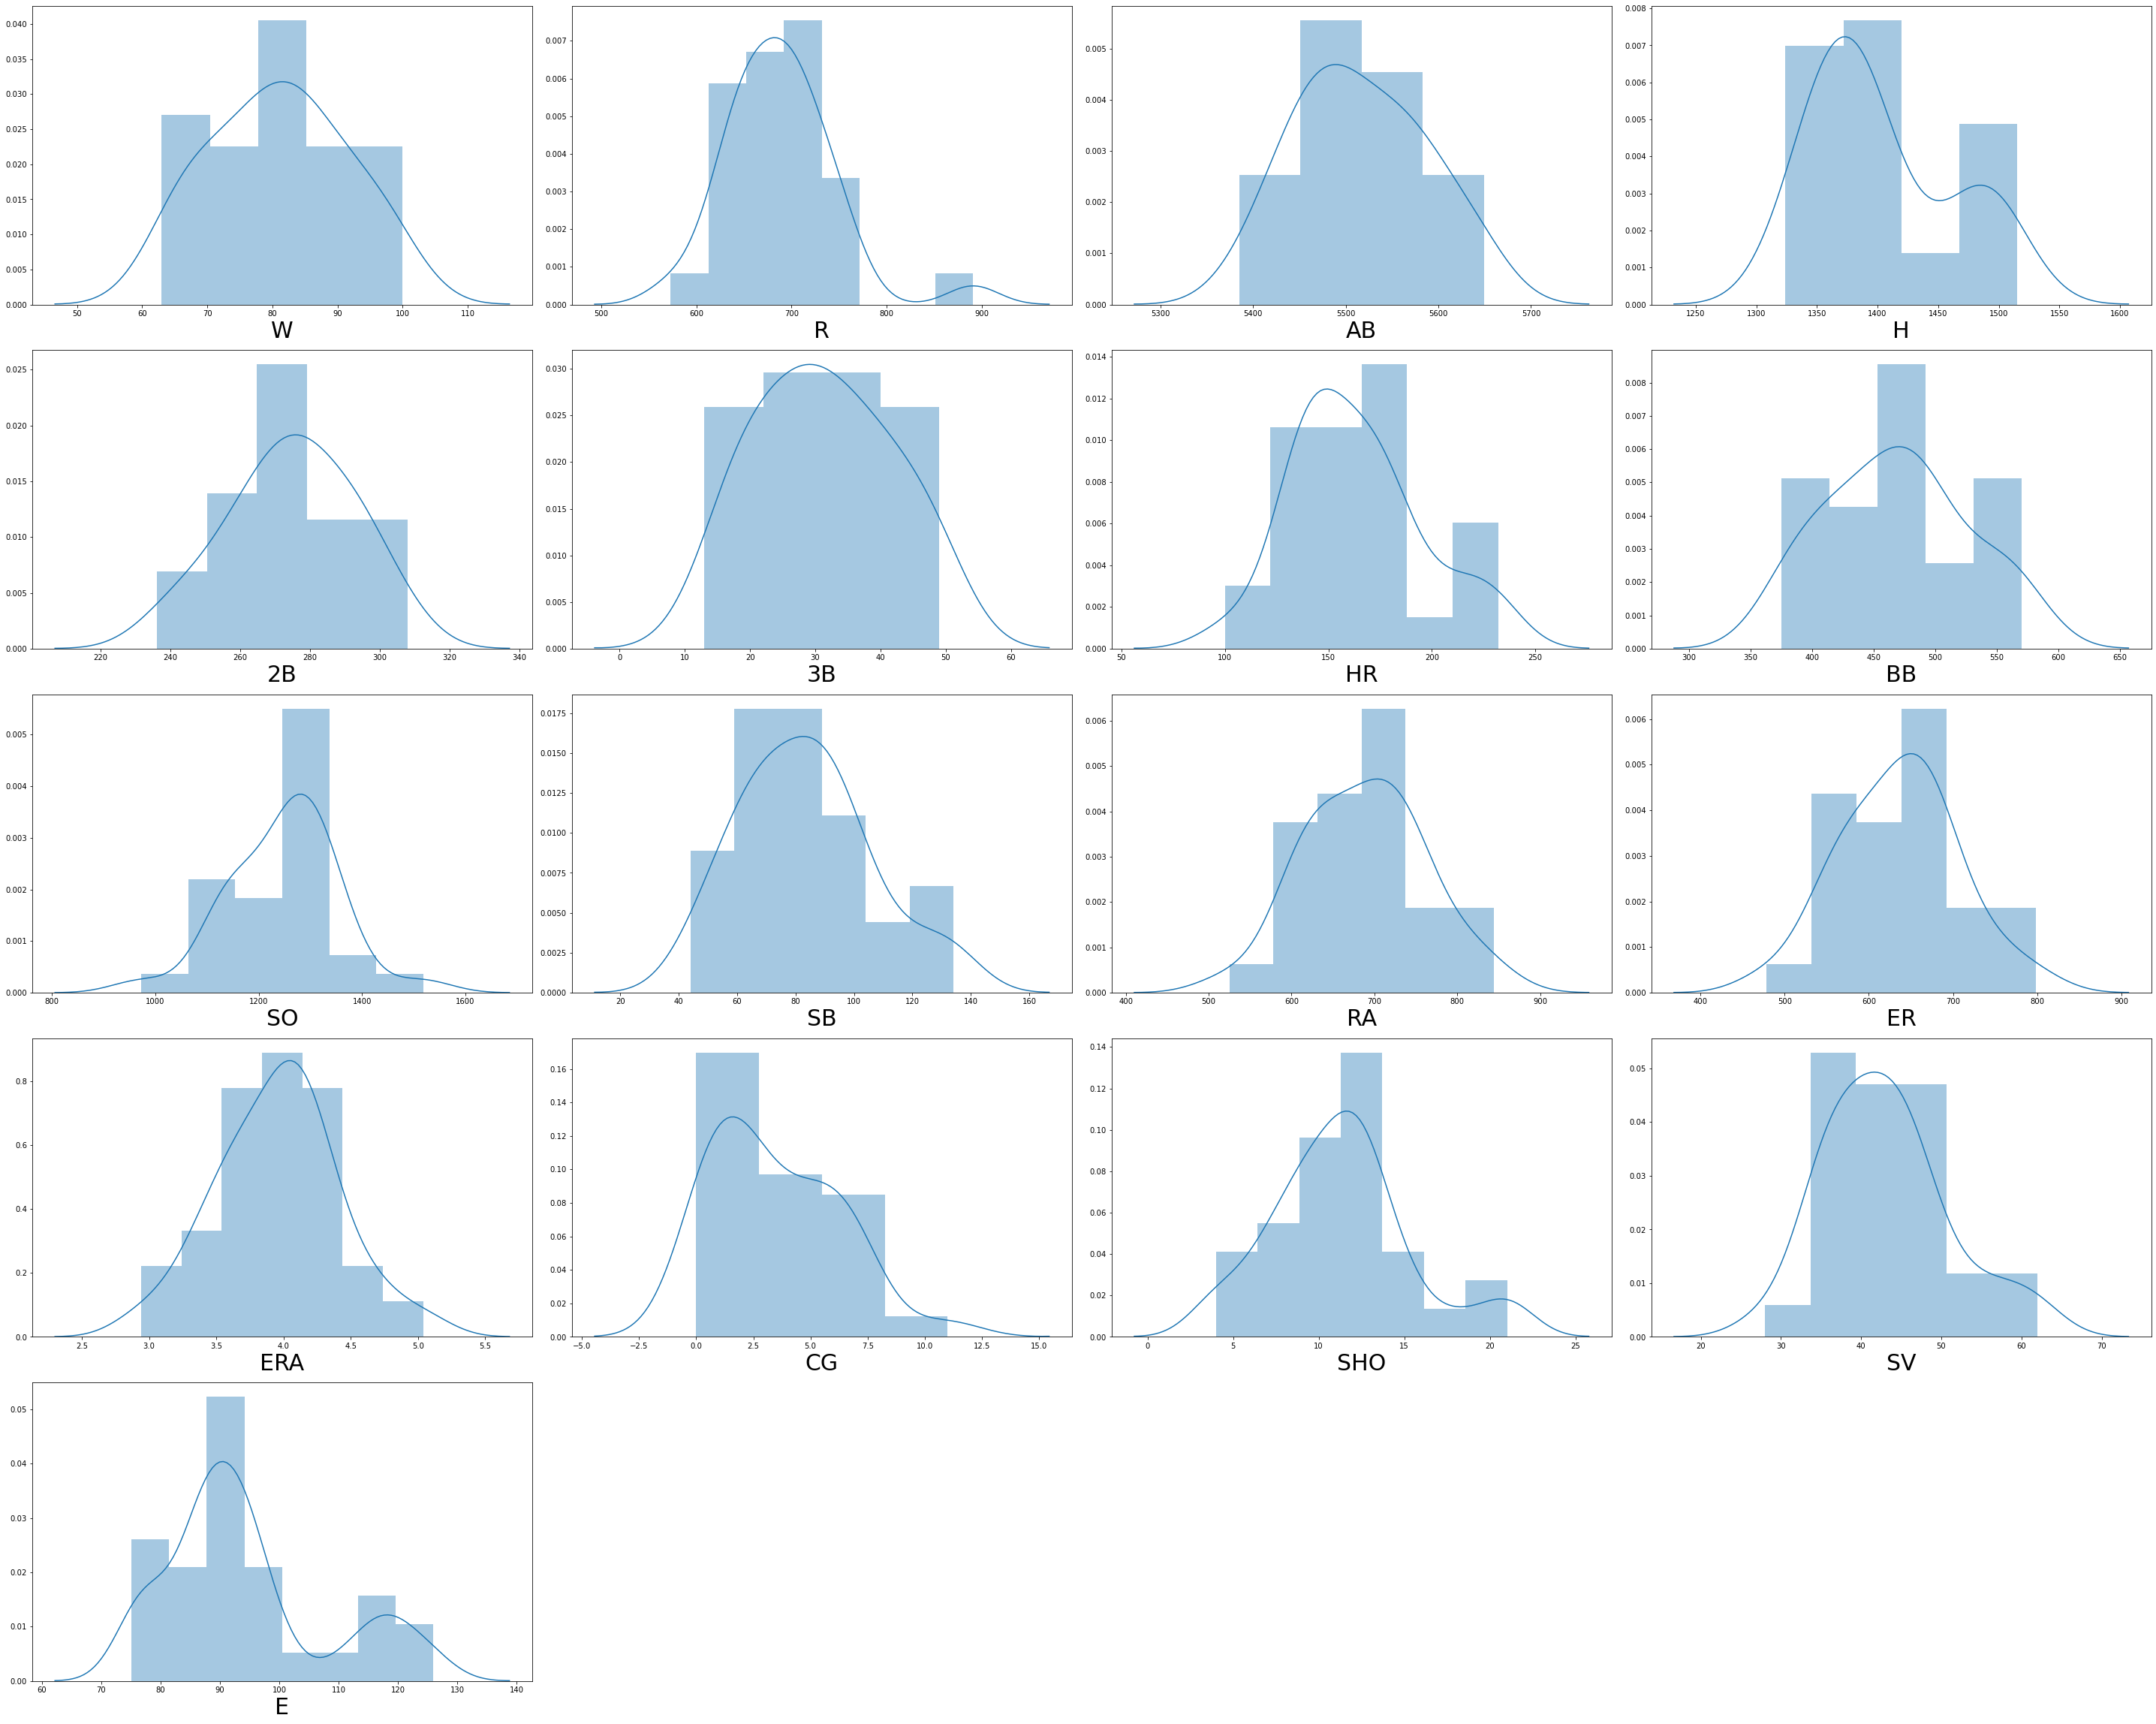

In [10]:
# Visualising the data to check the skewness if any 
plt.figure(figsize=(40,32))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=30)
    plotnumber+=1
plt.tight_layout()

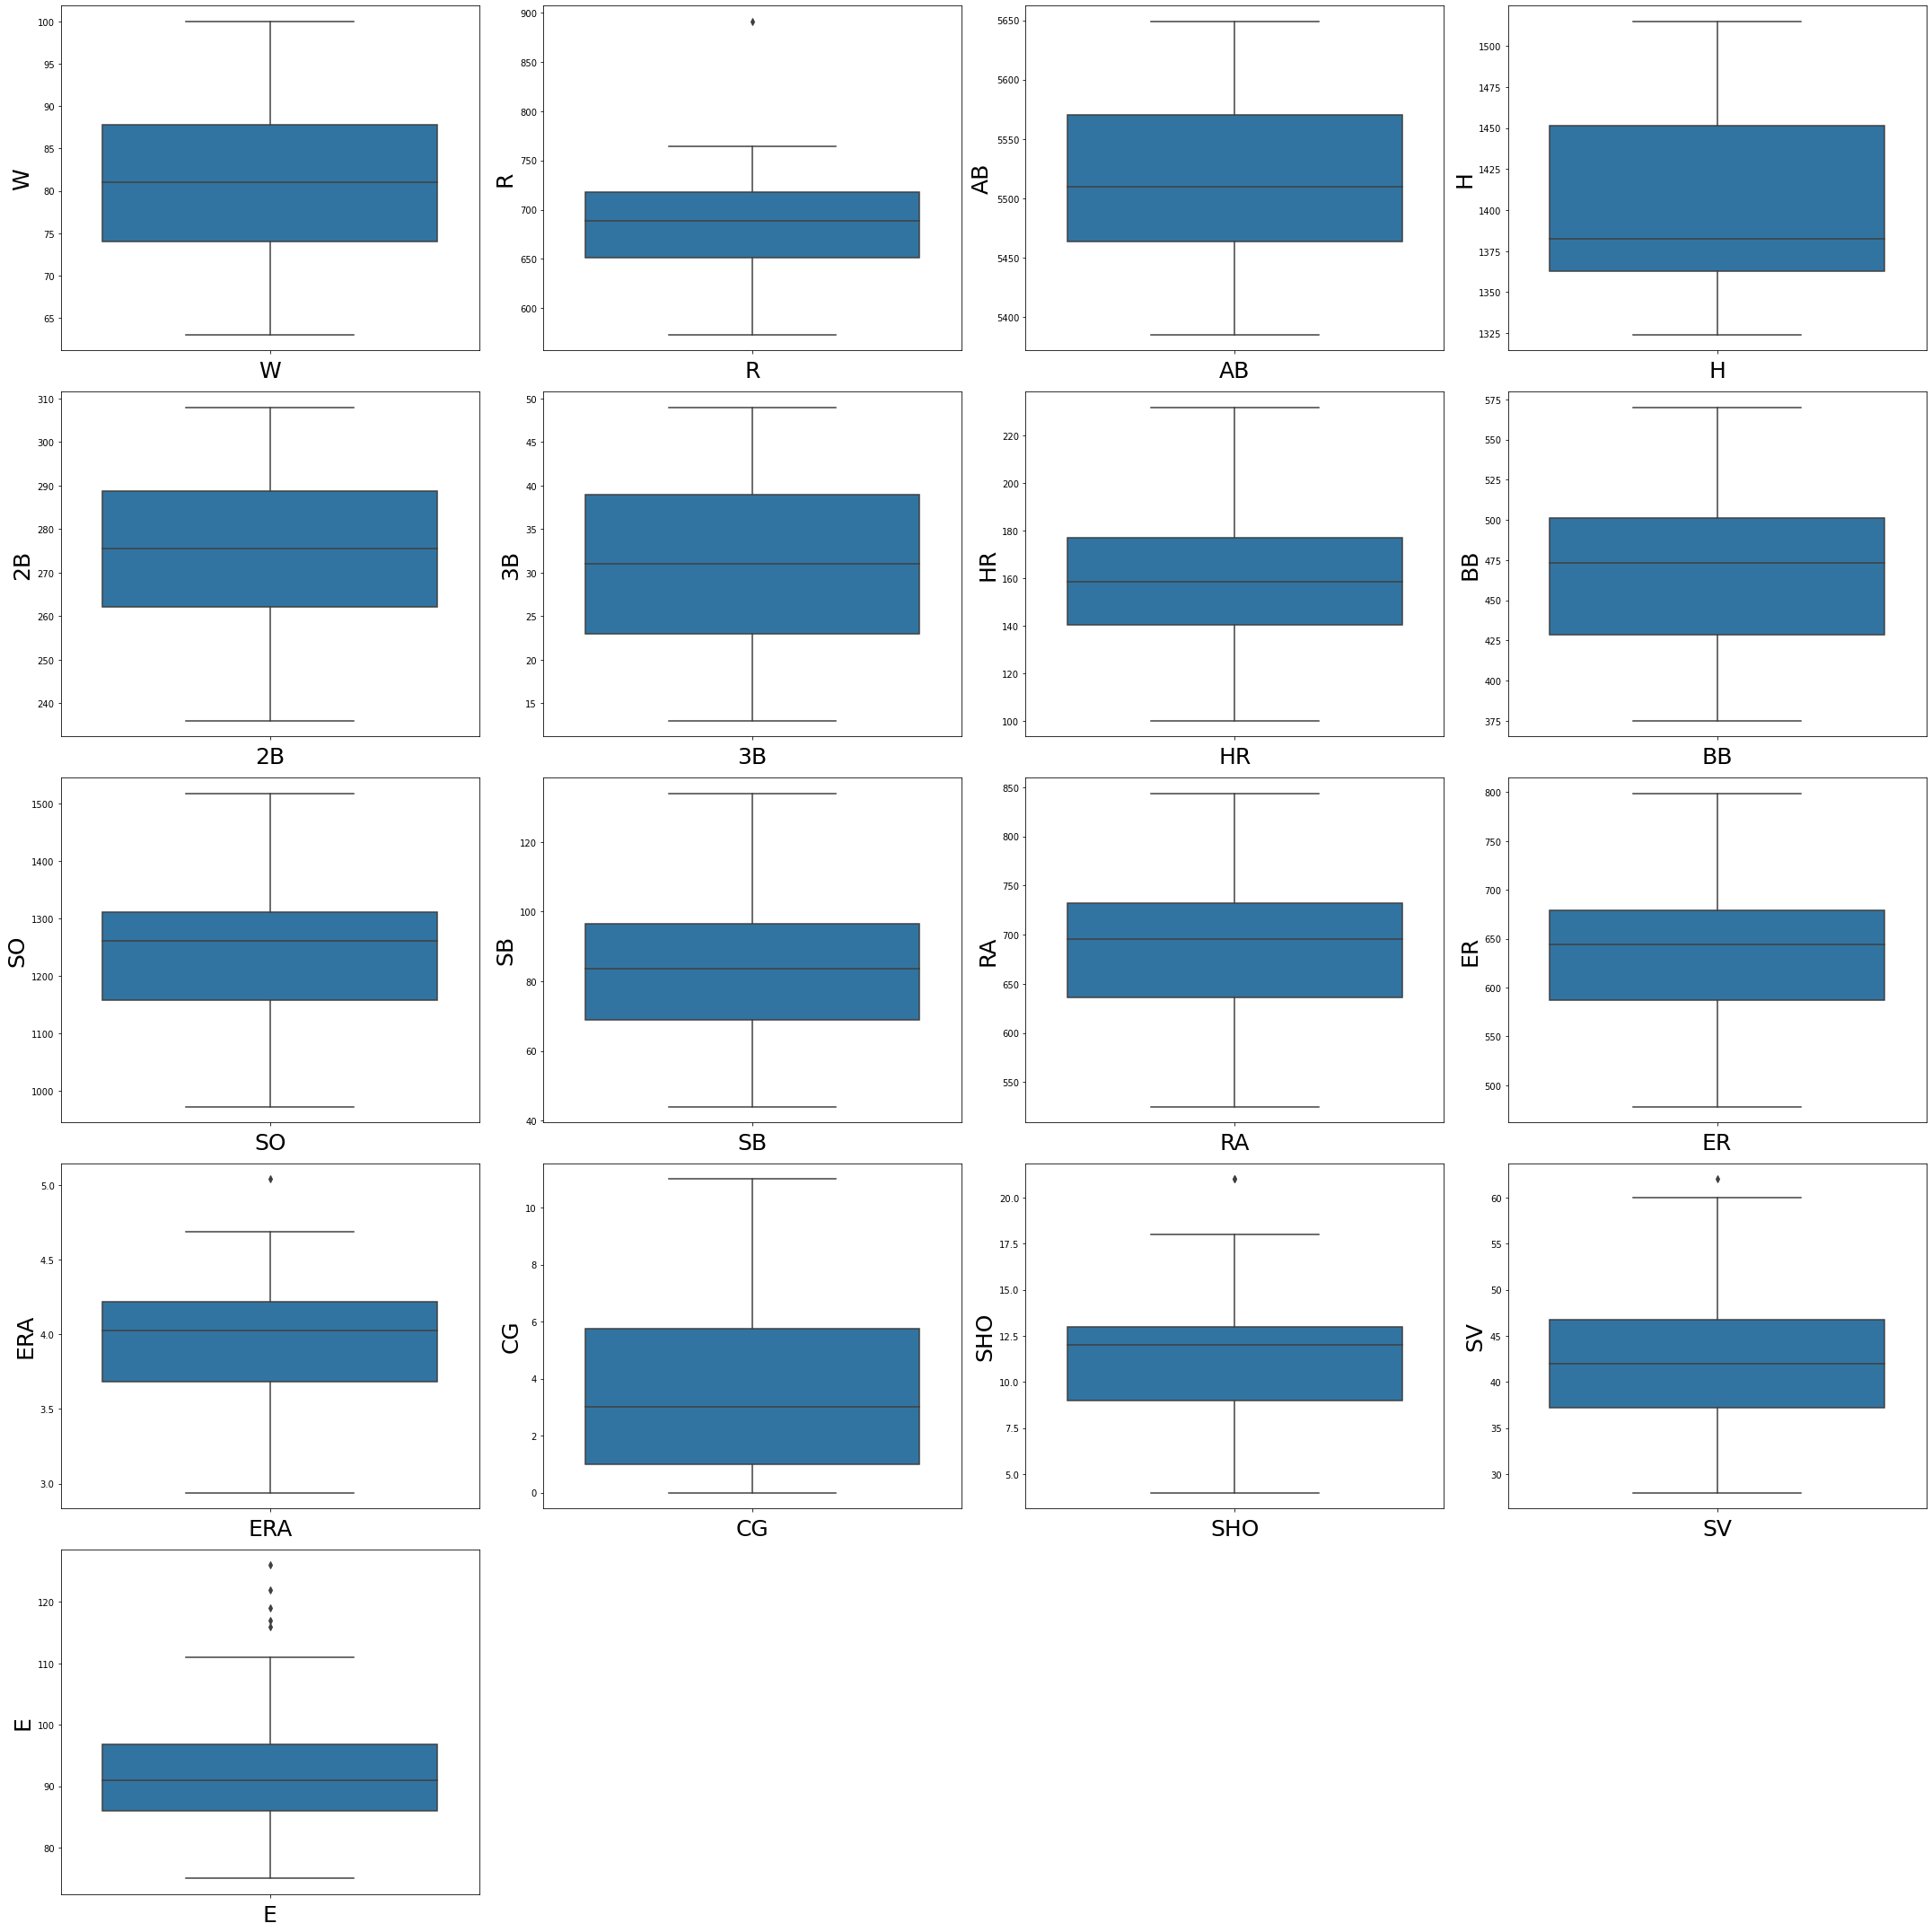

In [11]:
# checking the outliers in the data
plt.figure(figsize=(30,30))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column],orient="v")
        plt.xlabel(column,fontsize=25)
        plt.ylabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

In [12]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
iqr


W       13.7500
R       67.0000
AB     106.0000
H       88.5000
2B      26.5000
3B      16.0000
HR      36.7500
BB      73.0000
SO     154.0000
SB      27.5000
RA      96.2500
ER      92.0000
ERA      0.5375
CG       4.7500
SHO      4.0000
SV       9.5000
E       10.7500
dtype: float64

In [13]:
outlier1=(q3.R+1.5*iqr.R)
index=np.where(data["R"]>outlier1)
data=data.drop(data.index[index])
data.reset_index()

outlier2=(q3.ERA+1.5*iqr.ERA)
index=np.where(data["ERA"]>outlier2)
data=data.drop(data.index[index])
data.reset_index()

outlier3=(q3.SHO+1.5*iqr.SHO)
index=np.where(data["SHO"]>outlier3)
data=data.drop(data.index[index])
data.reset_index()

outlier4=(q3.SV+1.5*iqr.SV)
index=np.where(data["SV"]>outlier4)
data=data.drop(data.index[index])
data.reset_index()

outlier5=(q3.E+1.5*iqr.E)
index=np.where(data["E"]>outlier5)
data=data.drop(data.index[index])
data.reset_index()



,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85


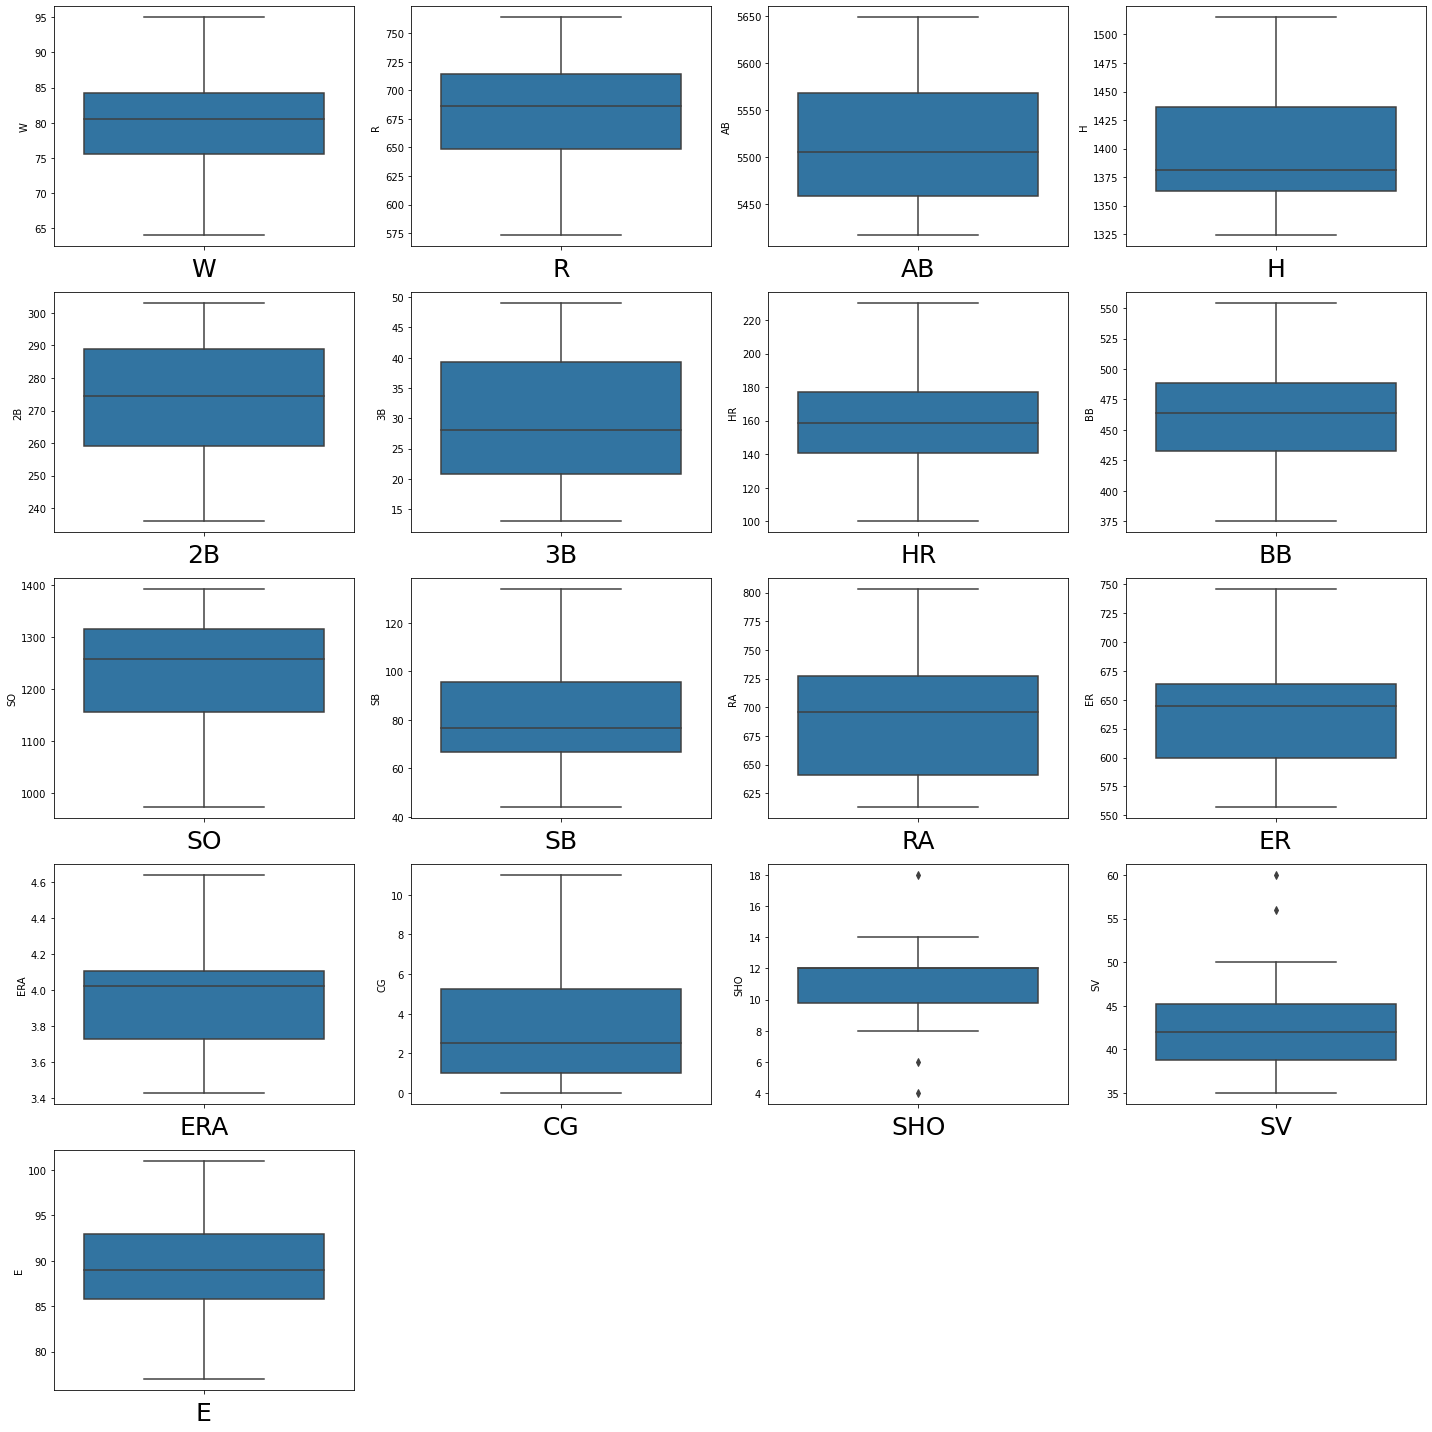

In [14]:
# checking the outliers in the data
plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        sns.boxplot(data[column],orient="v")
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout()

In [15]:
x=data.drop(columns="W")
y=data.W 


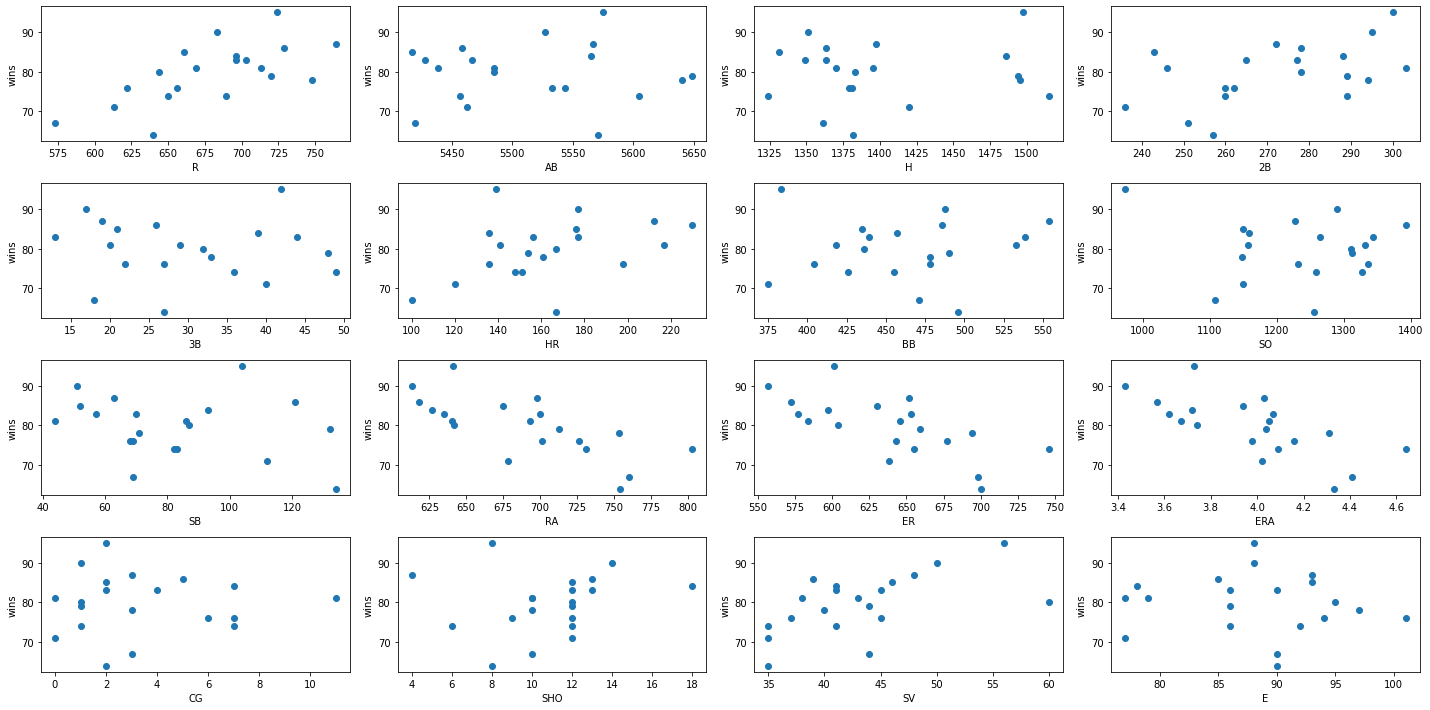

In [16]:
plt.figure(figsize=(20,12))
plotnumber=1
for column in x:
    if plotnumber<=20:
        ax=plt.subplot(5,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel("wins")
    plotnumber+=1
plt.tight_layout()

In [17]:
y=data.W

In [18]:
rsult=LinearRegression().fit(x,y)

In [19]:
rsult.score(x,y)

0.9692206213294169

In [20]:
import statsmodels.formula.api as smf
data.rename(columns=({"2B":"TWOB","3B":"THREEB"}),inplace=True)


In [21]:
lm1=smf.ols(formula='W ~ R',data=data).fit()
print(lm1.pvalues)
lm2=smf.ols(formula='W ~ AB',data=data).fit()
print(lm2.pvalues)
lm3=smf.ols(formula='W ~ H',data=data).fit()
print(lm3.pvalues)
lm4=smf.ols(formula='W ~ TWOB',data=data).fit()
print(lm4.pvalues)
lm5=smf.ols(formula='W ~ THREEB',data=data).fit()
print(lm5.pvalues)
lm6=smf.ols(formula='W ~ HR',data=data).fit()
print(lm6.pvalues)
lm7=smf.ols(formula='W ~ BB',data=data).fit()
print(lm7.pvalues)
lm8=smf.ols(formula='W ~ SO',data=data).fit()
print(lm8.pvalues)
lm9=smf.ols(formula='W ~ SB',data=data).fit()
print(lm9.pvalues)
lm10=smf.ols(formula='W ~ RA',data=data).fit()
print(lm10.pvalues)
lm11=smf.ols(formula='W ~ ER',data=data).fit()
print(lm11.pvalues)
lm12=smf.ols(formula='W ~ ERA',data=data).fit()
print(lm12.pvalues)
lm13=smf.ols(formula='W ~ CG',data=data).fit()
print(lm13.pvalues)
lm14=smf.ols(formula='W ~ SHO',data=data).fit()
print(lm14.pvalues)
lm15=smf.ols(formula='W ~ SV',data=data).fit()
print(lm15.pvalues)
lm16=smf.ols(formula='W ~ E',data=data).fit()
print(lm16.pvalues)


Intercept    0.646471
R            0.001390
dtype: float64
Intercept    0.642548
AB           0.907691
dtype: float64
Intercept    0.124372
H            0.740687
dtype: float64
Intercept    0.196217
TWOB         0.024398
dtype: float64
Intercept    6.972204e-12
THREEB       7.984397e-01
dtype: float64
Intercept    3.290987e-07
HR           9.222762e-02
dtype: float64
Intercept    0.000278
BB           0.818580
dtype: float64
Intercept    0.000531
SO           0.635387
dtype: float64
Intercept    9.075935e-12
SB           2.697181e-01
dtype: float64
Intercept    3.300791e-08
RA           4.800951e-04
dtype: float64
Intercept    6.979182e-08
ER           8.737573e-04
dtype: float64
Intercept    3.582603e-08
ERA          4.851323e-04
dtype: float64
Intercept    1.137854e-16
CG           9.968018e-01
dtype: float64
Intercept    9.989339e-10
SHO          5.073681e-01
dtype: float64
Intercept    0.000040
SV           0.008285
dtype: float64
Intercept    0.001444
E            0.729393
dtype: 

In [22]:

#it indicates their is no relation between number of wins and AB,H,BB,SO,E 

In [23]:
x_new=data.drop(columns=["W","AB","H","BB","SO","E"])
y=data.W

In [24]:
result=LinearRegression().fit(x_new,y)

In [25]:
result.score(x_new,y)

0.9180215330988997

In [26]:
# We saw that the accuracy decreased .

In [27]:
scaler=StandardScaler()

In [28]:
x=scaler.fit_transform(x)

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=39)
regression=LinearRegression()
regression.fit(x_train,y_train)
y_pred=regression.predict(x_test)
y_pred

array([65.22264721, 87.98518985, 84.67534753, 71.67857905, 72.68248298,
       94.42648435])

In [137]:
from sklearn.ensemble import RandomForestRegressor 
rfr= RandomForestRegressor()
rfr.fit(x_train,y_train)
yy_pred=rfr.predict(x_test)
rfr.score(x_test,y_test)

-0.1709115589016834

In [140]:
#regression.score(x_train,y_train)
regression.score(x_test,y_test)

0.8046858724674607

In [146]:
#Hence a good accuracy of  80% is retained.

In [33]:
# checking the best parameters 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest,f_classif

In [34]:
x=data.drop(columns="W")
y=data.W 

best_features=SelectKBest(score_func=f_classif,k=14)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Column_names","Scores_obtained"]
print(feature_scores.nlargest(14,"Scores_obtained"))  

   Column_names  Scores_obtained
0             R         4.765857
15            E         4.080000
8            SB         3.415345
14           SV         2.912719
9            RA         2.026253
1            AB         1.816023
7            SO         1.769528
13          SHO         1.733913
11          ERA         1.143385
10           ER         1.043160
5            HR         0.817083
2             H         0.739401
4        THREEB         0.707573
3          TWOB         0.690332


In [35]:
final_x=data[["R","E","SB","SV","RA","AB","SO","SHO","ERA","ER","HR","H","THREEB","TWOB"]]

In [36]:
final_x

,R,E,SB,SV,RA,AB,SO,SHO,ERA,ER,HR,H,THREEB,TWOB
0,724,88,104,56,641,5575,973,8,3.73,601,139,1497,42,300
1,696,86,70,45,700,5467,1264,12,4.07,653,156,1349,44,277
2,669,79,86,38,640,5439,1157,10,3.67,584,141,1395,29,303
3,622,101,68,37,701,5533,1231,9,3.98,643,136,1381,27,260
4,689,86,83,35,803,5605,1259,12,4.64,746,151,1515,49,289
6,764,93,63,48,698,5567,1227,4,4.03,652,212,1397,19,272
7,713,77,44,43,693,5485,1331,10,4.05,646,217,1370,20,246
8,644,95,87,60,642,5485,1310,12,3.74,604,167,1383,32,278
9,748,97,71,40,753,5640,1148,10,4.31,694,161,1495,33,294
11,729,85,121,39,618,5459,1392,13,3.57,572,230,1363,26,278


In [37]:
x_scaled=scaler.fit_transform(final_x)
x_scaled.shape[1]
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=final_x.columns
vif

,vif,features
0,9.126560,R
1,2.683122,E
2,2.363841,SB
3,2.455289,SV
4,139.479599,RA
5,27.012305,AB
6,5.515676,SO
7,3.048643,SHO
8,1247.946823,ERA
9,1361.623048,ER


In [38]:
final_x=final_x.drop(columns=["RA","AB","ERA","ER","HR","H"])

In [39]:
final_x

,R,E,SB,SV,SO,SHO,THREEB,TWOB
0,724,88,104,56,973,8,42,300
1,696,86,70,45,1264,12,44,277
2,669,79,86,38,1157,10,29,303
3,622,101,68,37,1231,9,27,260
4,689,86,83,35,1259,12,49,289
6,764,93,63,48,1227,4,19,272
7,713,77,44,43,1331,10,20,246
8,644,95,87,60,1310,12,32,278
9,748,97,71,40,1148,10,33,294
11,729,85,121,39,1392,13,26,278


In [40]:
x_train,x_test,y_train,y_test=train_test_split(final_x,y,test_size=0.25,random_state=47)
Knn=KNeighborsClassifier()

Knn.fit(x_train,y_train)
y_pres=Knn.predict(x_test)
y_pres

array([67, 74, 74, 64, 64], dtype=int64)

In [41]:
y_test

12    85
21    83
27    79
4     74
22    71
Name: W, dtype: int64

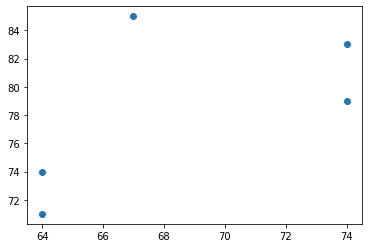

In [42]:
plt.scatter(y_pres,y_test)

In [43]:
from sklearn.model_selection import cross_val_score

In [45]:
cross_val_score(Knn,final_x,y,cv=2)

array([0.1, 0. ])

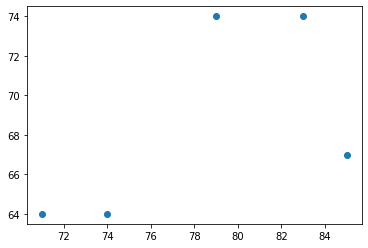

In [46]:
plt.scatter(y_test,y_pres)

In [59]:
# it shows the predicted results are matching and showing a good accuracy 
data=pd.read_csv(r"C:\Users\shashank agarwal\Downloads\baseball.csv")


In [60]:
q1=data.quantile(0.25)
q3=data.quantile(0.75)
iqr=q3-q1
iqr

outlier1=(q3.R+1.5*iqr.R)
index=np.where(data["R"]>outlier1)
data=data.drop(data.index[index])
data.reset_index()

outlier2=(q3.ERA+1.5*iqr.ERA)
index=np.where(data["ERA"]>outlier2)
data=data.drop(data.index[index])
data.reset_index()

outlier3=(q3.SHO+1.5*iqr.SHO)
index=np.where(data["SHO"]>outlier3)
data=data.drop(data.index[index])
data.reset_index()

outlier4=(q3.SV+1.5*iqr.SV)
index=np.where(data["SV"]>outlier4)
data=data.drop(data.index[index])
data.reset_index()

outlier5=(q3.E+1.5*iqr.E)
index=np.where(data["E"]>outlier5)
data=data.drop(data.index[index])
data.reset_index()





,index,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,11,86,729,5459,1363,278,26,230,486,1392,121,618,572,3.57,5,13,39,85


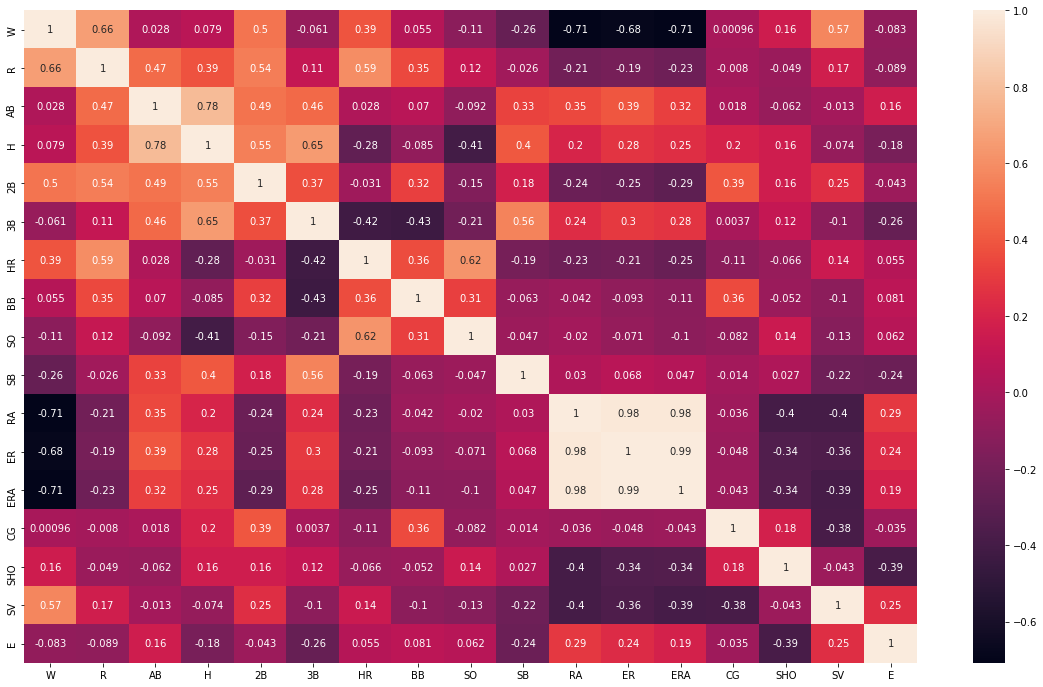

In [61]:
corr=data.corr()
corr.shape

plt.figure(figsize=(20,12))
sns.heatmap(corr,annot=True)
plt.show()

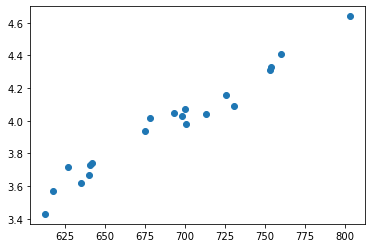

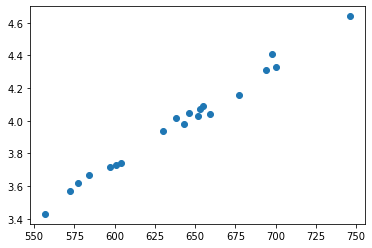

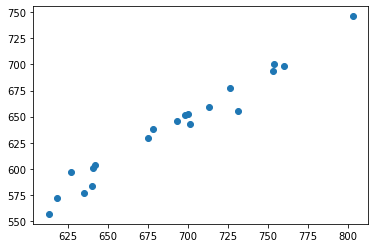

In [62]:
plt.scatter(data.RA,data.ERA)
plt.show()

plt.scatter(data.ER,data.ERA)
plt.show()

plt.scatter(data.RA,data.ER)
plt.show()

In [88]:
x=data.drop(columns=["W","ERA","RA","ER","CG"])
y=data.W

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=43)
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(x_train,y_train)
y_pred=ada.predict(x_train)

In [90]:
from sklearn import metrics


In [91]:
print(metrics.r2_score(y_train,y_pred))

0.9867931087172435


In [92]:
y_preds=ada.predict(x_test)
print(metrics.r2_score(y_test,y_preds))


0.36985596707818935


In [102]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
params={'n_estimators':[46,57,65,70],'learning_rate':[0.25,0.30,0.40]}
rnd_srch=RandomizedSearchCV(AdaBoostRegressor(),cv=5,param_distributions=params)
rnd_srch.fit(x_train,y_train)
rnd_srch.best_estimator_

AdaBoostRegressor(learning_rate=0.25, n_estimators=70)

In [103]:
ada=AdaBoostRegressor(base_estimator=dt,learning_rate=0.25,n_estimators=70)

In [104]:
ada.fit(x_train,y_train)
y_predfinal=ada.predict(x_test)
print(metrics.r2_score(y_test,y_predfinal))

0.5720164609053497


In [105]:
#hence it shows the accuracy of 57%

In [147]:
final_model="baseball.pickle"
pickle.dump(regression,open(final_model,'wb'))
